## Topic Model Results

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_pickle("C:\\Users\\User\\OneDrive\Documents\\GitHub\\NLP\\US Presedential Speeches\\final_df.pkl")

In [6]:
df.head(10)

,index,sentence,speech,president,speech_date,Regime change,American Values,Al Qaeda,Democracy Promotion,Middle East Security Threats,Bolstering a Nation's Security Forces,Middle East Security Dynamic,Freedom,U.S. Actions and Intentions,Religious Liberty,roberta_neg,roberta_neu,roberta_pos,YearMonth,YRMNTH
0,0,Good afternoon.,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.091866,0.020608,-0.013549,0.012241,0.129675,0.121716,-0.019216,0.057875,-0.051857,0.021145,0.015199,0.193120,0.791681,July 2021,202107
1,1,"Earlier today, I was briefed by our senior mil...",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.462341,0.170909,0.502308,0.706292,0.296541,0.224687,-0.120064,0.599147,-0.025133,0.397244,0.036000,0.936791,0.027209,July 2021,202107
2,2,"When I announced our drawdown in April, I said...",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.164941,0.084289,0.384271,0.428225,0.433138,0.283634,0.486977,0.124019,0.236934,0.134657,0.002977,0.512427,0.484597,July 2021,202107
3,3,Our military mission in Afghanistan will concl...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.294849,0.466644,0.720763,0.41306,0.481794,-0.027502,0.32805,0.036519,0.448192,0.367727,0.021283,0.952112,0.026605,July 2021,202107
4,4,The drawdown is proceeding in a secure and ord...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.166568,0.59265,0.154344,-0.28015,0.251566,0.446406,-0.209066,0.491736,-0.196509,0.079829,0.011207,0.428847,0.559946,July 2021,202107
5,5,Our military commanders advised me that once I...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.07379,0.409005,0.142683,-0.116069,0.062206,0.195165,0.690335,0.377438,0.295861,0.118202,0.126221,0.843664,0.030115,July 2021,202107
6,6,"And in this context, speed is safety.",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.23961,-0.03765,-0.241951,-0.272218,0.364561,-0.205136,-0.238409,-0.367949,-0.456665,-0.40595,0.033741,0.711399,0.254859,July 2021,202107
7,7,And thanks to the way in which we have managed...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,-0.251648,0.159876,0.277859,0.234949,-0.176445,0.281015,0.428651,0.424363,0.290548,0.142398,0.159624,0.651551,0.188825,July 2021,202107
8,8,Conducting our drawdown differently would have...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,-0.179814,0.091123,0.243277,0.217134,0.309907,0.40624,0.380313,-0.025115,0.420105,0.215146,0.620268,0.368953,0.010780,July 2021,202107
9,9,"To me, those risks were unacceptable.",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,-0.120029,0.143085,0.186712,0.005766,-0.136049,-0.130568,0.627646,-0.120476,0.981618,0.623716,0.953766,0.043718,0.002516,July 2021,202107


In [7]:
df['sentence'][5]

'Our military commanders advised me that once I made the decision to end the war, we needed to move swiftly to conduct the main elements of the drawdown.'

*A cosine value of 0 means that the two vectors are at 90 degrees to each other (orthogonal) and have no match. The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.*

---

### Vertical Bar Chart - Visualise the Average similarity scores for each Topic

In [8]:
selected_df = df.iloc[:,[2,3,5,6,7,8,9,10,11,12,13,14]]

In [9]:
selected_df.head(10)

,speech,president,Regime change,American Values,Al Qaeda,Democracy Promotion,Middle East Security Threats,Bolstering a Nation's Security Forces,Middle East Security Dynamic,Freedom,U.S. Actions and Intentions,Religious Liberty
0,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.091866,0.020608,-0.013549,0.012241,0.129675,0.121716,-0.019216,0.057875,-0.051857,0.021145
1,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.462341,0.170909,0.502308,0.706292,0.296541,0.224687,-0.120064,0.599147,-0.025133,0.397244
2,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.164941,0.084289,0.384271,0.428225,0.433138,0.283634,0.486977,0.124019,0.236934,0.134657
3,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.294849,0.466644,0.720763,0.41306,0.481794,-0.027502,0.32805,0.036519,0.448192,0.367727
4,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.166568,0.59265,0.154344,-0.28015,0.251566,0.446406,-0.209066,0.491736,-0.196509,0.079829
5,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.07379,0.409005,0.142683,-0.116069,0.062206,0.195165,0.690335,0.377438,0.295861,0.118202
6,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.23961,-0.03765,-0.241951,-0.272218,0.364561,-0.205136,-0.238409,-0.367949,-0.456665,-0.40595
7,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,-0.251648,0.159876,0.277859,0.234949,-0.176445,0.281015,0.428651,0.424363,0.290548,0.142398
8,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,-0.179814,0.091123,0.243277,0.217134,0.309907,0.40624,0.380313,-0.025115,0.420105,0.215146
9,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,-0.120029,0.143085,0.186712,0.005766,-0.136049,-0.130568,0.627646,-0.120476,0.981618,0.623716


In [10]:
selected_df.shape

(2293, 12)

In [11]:
pivot_df = pd.DataFrame(selected_df.pivot(columns=['speech', 'president']).mean()).reset_index()

In [12]:
pivot_df

,level_0,speech,president,0
0,Regime change,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.166486
1,Regime change,Remarks on Situation in Afghansitan,Joe Biden,0.187009
2,Regime change,Statement on Terror Attacks in Afghanistan,Joe Biden,0.158459
3,Regime change,Remarks on National Security Strategy,Donald Trump,0.218236
4,Regime change,Statement on Iran,Donald Trump,0.223758
...,...,...,...,...
175,Religious Liberty,Remarks on Freedom in Iraq and Middle East,George Bush,0.184138
176,Religious Liberty,Address on Military Operations in Iraq,George Bush,0.132832
177,Religious Liberty,Remarks on the War on Terror,George Bush,0.159023
178,Religious Liberty,Address on Renewal in Iraq,George Bush,0.161298


In [13]:
pivot_df.rename(columns={'level_0':'Topic Label', 0:'Average Similarity Score'}, inplace=True)

In [14]:
grouped_df = pd.DataFrame(pivot_df.groupby(['Topic Label'])['Average Similarity Score'].mean().sort_values(ascending=False))

In [15]:
grouped_df = grouped_df.sort_values(by='Average Similarity Score', ascending=False).reset_index()

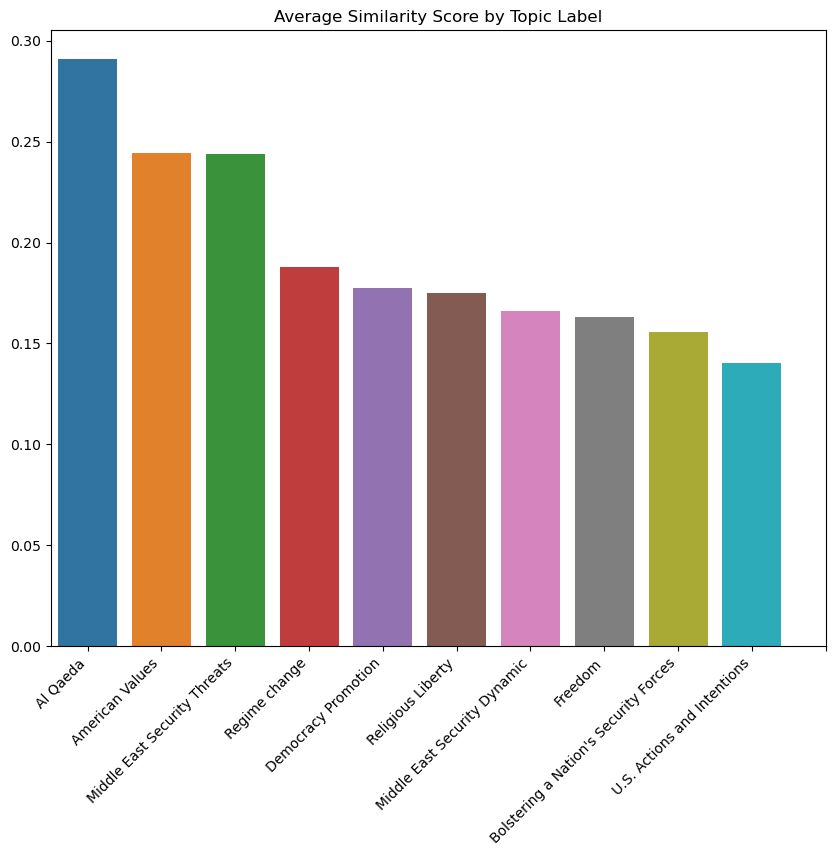

In [53]:
fig = sns.barplot(data=grouped_df, x='Topic Label', y='Average Similarity Score')
plt.rcParams['figure.figsize']= (10,8)
plt.xticks(ticks=[i for i in range(0,11)] ,rotation=45, ha='right')
plt.title("Average Similarity Score by Topic Label")
plt.xlabel('')
plt.ylabel('')
plt.show(fig)

---

### Heatmap - Visualise the Average similarity scores for each Speech with each Topic 

In [19]:
df

,index,sentence,speech,president,speech_date,Regime change,American Values,Al Qaeda,Democracy Promotion,Middle East Security Threats,Bolstering a Nation's Security Forces,Middle East Security Dynamic,Freedom,U.S. Actions and Intentions,Religious Liberty,roberta_neg,roberta_neu,roberta_pos,YearMonth,YRMNTH
0,0,Good afternoon.,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.091866,0.020608,-0.013549,0.012241,0.129675,0.121716,-0.019216,0.057875,-0.051857,0.021145,0.015199,0.193120,0.791681,July 2021,202107
1,1,"Earlier today, I was briefed by our senior mil...",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.462341,0.170909,0.502308,0.706292,0.296541,0.224687,-0.120064,0.599147,-0.025133,0.397244,0.036000,0.936791,0.027209,July 2021,202107
2,2,"When I announced our drawdown in April, I said...",Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.164941,0.084289,0.384271,0.428225,0.433138,0.283634,0.486977,0.124019,0.236934,0.134657,0.002977,0.512427,0.484597,July 2021,202107
3,3,Our military mission in Afghanistan will concl...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.294849,0.466644,0.720763,0.41306,0.481794,-0.027502,0.32805,0.036519,0.448192,0.367727,0.021283,0.952112,0.026605,July 2021,202107
4,4,The drawdown is proceeding in a secure and ord...,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,2021-07-01,0.166568,0.59265,0.154344,-0.28015,0.251566,0.446406,-0.209066,0.491736,-0.196509,0.079829,0.011207,0.428847,0.559946,July 2021,202107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,You'll serve your country and our values.,Remarks on National Security and the War Effort,George Bush,2004-07-01,-0.219191,0.230108,0.315848,-0.079737,0.105131,-0.225765,0.63331,-0.37586,0.645601,0.112849,0.027372,0.332380,0.640248,July 2004,200407
2289,2289,You'll protect your fellow citizens.,Remarks on National Security and the War Effort,George Bush,2004-07-01,0.306164,-0.045996,-0.165452,-0.206985,0.309835,-0.464891,-0.082501,-0.556862,-0.061615,-0.129418,0.031046,0.516248,0.452705,July 2004,200407
2290,2290,"And, by your effort and example, you will adva...",Remarks on National Security and the War Effort,George Bush,2004-07-01,-0.002578,0.268779,0.202175,-0.091764,0.431797,0.178318,-0.245486,-0.216041,-0.225712,-0.196265,0.003332,0.147430,0.849238,July 2004,200407
2291,2291,And so I'm here to thank you for your commitme...,Remarks on National Security and the War Effort,George Bush,2004-07-01,0.391975,-0.124452,-0.072403,0.098981,0.151401,-0.296112,0.194545,-0.159157,-0.035106,-0.047559,0.001099,0.022419,0.976482,July 2004,200407


In [22]:
heatmap_df = df.iloc[:,[2,3,5,6,7,8,9,10,11,12,13,14,18,19]]
heatmap_df

,speech,president,Regime change,American Values,Al Qaeda,Democracy Promotion,Middle East Security Threats,Bolstering a Nation's Security Forces,Middle East Security Dynamic,Freedom,U.S. Actions and Intentions,Religious Liberty,YearMonth,YRMNTH
0,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.091866,0.020608,-0.013549,0.012241,0.129675,0.121716,-0.019216,0.057875,-0.051857,0.021145,July 2021,202107
1,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.462341,0.170909,0.502308,0.706292,0.296541,0.224687,-0.120064,0.599147,-0.025133,0.397244,July 2021,202107
2,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.164941,0.084289,0.384271,0.428225,0.433138,0.283634,0.486977,0.124019,0.236934,0.134657,July 2021,202107
3,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.294849,0.466644,0.720763,0.41306,0.481794,-0.027502,0.32805,0.036519,0.448192,0.367727,July 2021,202107
4,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.166568,0.59265,0.154344,-0.28015,0.251566,0.446406,-0.209066,0.491736,-0.196509,0.079829,July 2021,202107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,Remarks on National Security and the War Effort,George Bush,-0.219191,0.230108,0.315848,-0.079737,0.105131,-0.225765,0.63331,-0.37586,0.645601,0.112849,July 2004,200407
2289,Remarks on National Security and the War Effort,George Bush,0.306164,-0.045996,-0.165452,-0.206985,0.309835,-0.464891,-0.082501,-0.556862,-0.061615,-0.129418,July 2004,200407
2290,Remarks on National Security and the War Effort,George Bush,-0.002578,0.268779,0.202175,-0.091764,0.431797,0.178318,-0.245486,-0.216041,-0.225712,-0.196265,July 2004,200407
2291,Remarks on National Security and the War Effort,George Bush,0.391975,-0.124452,-0.072403,0.098981,0.151401,-0.296112,0.194545,-0.159157,-0.035106,-0.047559,July 2004,200407


In [23]:
heatmap_df['Speech-Pres-Date'] = heatmap_df['speech'] + ': ' + heatmap_df['president'] + ' - ' + heatmap_df['YearMonth']
heatmap_df['Speech-Pres-Date'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_40388\2906616246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_df['Speech-Pres-Date'] = heatmap_df['speech'] + ': ' + heatmap_df['president'] + ' - ' + heatmap_df['YearMonth']


array(['Speech on the Drawdown of US Forces in Afghanistan: Joe Biden - July 2021',
       'Remarks on Situation in Afghansitan: Joe Biden - August 2021',
       'Statement on Terror Attacks in Afghanistan: Joe Biden - August 2021',
       'Remarks on National Security Strategy: Donald Trump - December 2017',
       'Statement on Iran: Donald Trump - January 2020',
       'Statement on the Death of Abu Bakr al-Baghdadi: Donald Trump - October 2019',
       'Iraq Airstrikes and Humanitarian Aid: Barack Obama - August 2014',
       'Speech on Strategy in Afghanistan and Pakistan: Barack Obama - December 2009',
       'Remarks on the End of the War in Iraq: Barack Obama - October 2011',
       'Remarks on the Afghanistan Pullout: Barack Obama - June 2011',
       'American Diplomacy in the Middle East: Barack Obama - May 2011',
       'A Way Forward in Iraq: Barack Obama - November 2006',
       'Address to the Nation on Iraq: George Bush - March 2003',
       'Remarks on Freedom in Iraq 

In [24]:
heatmap_df.head()

,speech,president,Regime change,American Values,Al Qaeda,Democracy Promotion,Middle East Security Threats,Bolstering a Nation's Security Forces,Middle East Security Dynamic,Freedom,U.S. Actions and Intentions,Religious Liberty,YearMonth,YRMNTH,Speech-Pres-Date
0,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.091866,0.020608,-0.013549,0.012241,0.129675,0.121716,-0.019216,0.057875,-0.051857,0.021145,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...
1,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.462341,0.170909,0.502308,0.706292,0.296541,0.224687,-0.120064,0.599147,-0.025133,0.397244,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...
2,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.164941,0.084289,0.384271,0.428225,0.433138,0.283634,0.486977,0.124019,0.236934,0.134657,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...
3,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.294849,0.466644,0.720763,0.41306,0.481794,-0.027502,0.32805,0.036519,0.448192,0.367727,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...
4,Speech on the Drawdown of US Forces in Afghani...,Joe Biden,0.166568,0.59265,0.154344,-0.28015,0.251566,0.446406,-0.209066,0.491736,-0.196509,0.079829,July 2021,202107,Speech on the Drawdown of US Forces in Afghani...


In [28]:
heatmap_pivot_df = heatmap_df.drop(columns=['speech', 'president','YearMonth'], inplace=True)
heatmap_pivot_df =pd.DataFrame(heatmap_df.pivot(columns=['Speech-Pres-Date', 'YRMNTH']).mean()).reset_index().set_index('Speech-Pres-Date').rename(columns={'level_0':'Topic Label', 0:'Average Similarity Score'})

C:\Users\User\AppData\Local\Temp\ipykernel_40388\3441587958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_pivot_df = heatmap_df.drop(columns=['speech', 'president','YearMonth'], inplace=True)


In [29]:
heatmap_pivot_df_sorted = heatmap_pivot_df.sort_values(by='YRMNTH', ascending=True)
heatmap_pivot_df_sorted.drop(columns=['YRMNTH'], inplace=True)
heatmap_pivot_df_sorted

,Topic Label,Average Similarity Score
Speech-Pres-Date,,
Address to the Nation on Iraq: George Bush - March 2003,American Values,0.254229
Address to the Nation on Iraq: George Bush - March 2003,Al Qaeda,0.28129
Address to the Nation on Iraq: George Bush - March 2003,Religious Liberty,0.14004
Address to the Nation on Iraq: George Bush - March 2003,Democracy Promotion,0.174008
Address to the Nation on Iraq: George Bush - March 2003,U.S. Actions and Intentions,0.054579
...,...,...
Remarks on Situation in Afghansitan: Joe Biden - August 2021,Freedom,0.102105
Remarks on Situation in Afghansitan: Joe Biden - August 2021,Bolstering a Nation's Security Forces,0.06892
Statement on Terror Attacks in Afghanistan: Joe Biden - August 2021,Bolstering a Nation's Security Forces,0.009721


In [30]:
heatmap_pivot_df_pivoted = heatmap_pivot_df_sorted.pivot(columns='Topic Label', values='Average Similarity Score')

In [31]:
new_heatmap_index = ['Address to the Nation on Iraq: George Bush - March 2003', 'Remarks on Freedom in Iraq and Middle East: George Bush - November 2003', 
 'Remarks on National Security and the War Effort: George Bush - July 2004', 'Address on Renewal in Iraq: George Bush - December 2005',
 'A Way Forward in Iraq: Barack Obama - November 2006',
 'Address on Military Operations in Iraq: George Bush - January 2007', 'Remarks on the War on Terror: George Bush - March 2008',
 'Speech on Strategy in Afghanistan and Pakistan: Barack Obama - December 2009', 'American Diplomacy in the Middle East: Barack Obama - May 2011',
 'Remarks on the Afghanistan Pullout: Barack Obama - June 2011', 'Remarks on the End of the War in Iraq: Barack Obama - October 2011',
 'Iraq Airstrikes and Humanitarian Aid: Barack Obama - August 2014', 'Remarks on National Security Strategy: Donald Trump - December 2017',
 'Statement on the Death of Abu Bakr al-Baghdadi: Donald Trump - October 2019', 'Statement on Iran: Donald Trump - January 2020',
 'Speech on the Drawdown of US Forces in Afghanistan: Joe Biden - July 2021',
 'Remarks on Situation in Afghansitan: Joe Biden - August 2021', 'Statement on Terror Attacks in Afghanistan: Joe Biden - August 2021'
 ]

In [32]:
heatmap_pivot_df_pivoted = heatmap_pivot_df_pivoted.reindex(new_heatmap_index)

In [35]:
heatmap_pivot_df_pivoted.head()

Topic Label,Al Qaeda,American Values,Bolstering a Nation's Security Forces,Democracy Promotion,Freedom,Middle East Security Dynamic,Middle East Security Threats,Regime change,Religious Liberty,U.S. Actions and Intentions
Speech-Pres-Date,,,,,,,,,,
Address to the Nation on Iraq: George Bush - March 2003,0.28129,0.254229,0.252709,0.174008,0.208377,0.10145,0.295261,0.190708,0.14004,0.054579
Remarks on Freedom in Iraq and Middle East: George Bush - November 2003,0.202311,0.100168,0.152531,0.227142,0.134977,0.03196,0.236999,0.216001,0.184138,0.070039
Remarks on National Security and the War Effort: George Bush - July 2004,0.265993,0.221176,0.168256,0.1557,0.132313,0.157824,0.266483,0.167702,0.110889,0.0873
Address on Renewal in Iraq: George Bush - December 2005,0.283596,0.238979,0.158807,0.175871,0.148537,0.164375,0.250148,0.180328,0.161298,0.131439
A Way Forward in Iraq: Barack Obama - November 2006,0.264924,0.210348,0.200136,0.197906,0.181114,0.166618,0.22486,0.157535,0.147428,0.109527


In [46]:
heatmap_pivot_df_pivoted = heatmap_pivot_df_pivoted.astype(np.float64)

In [47]:
heatmap_pivot_df_pivoted.reset_index().set_index('Speech-Pres-Date')

Topic Label,Al Qaeda,American Values,Bolstering a Nation's Security Forces,Democracy Promotion,Freedom,Middle East Security Dynamic,Middle East Security Threats,Regime change,Religious Liberty,U.S. Actions and Intentions
Speech-Pres-Date,,,,,,,,,,
Address to the Nation on Iraq: George Bush - March 2003,0.281290,0.254229,0.252709,0.174008,0.208377,0.101450,0.295261,0.190708,0.140040,0.054579
Remarks on Freedom in Iraq and Middle East: George Bush - November 2003,0.202311,0.100168,0.152531,0.227142,0.134977,0.031960,0.236999,0.216001,0.184138,0.070039
Remarks on National Security and the War Effort: George Bush - July 2004,0.265993,0.221176,0.168256,0.155700,0.132313,0.157824,0.266483,0.167702,0.110889,0.087300
Address on Renewal in Iraq: George Bush - December 2005,0.283596,0.238979,0.158807,0.175871,0.148537,0.164375,0.250148,0.180328,0.161298,0.131439
A Way Forward in Iraq: Barack Obama - November 2006,0.264924,0.210348,0.200136,0.197906,0.181114,0.166618,0.224860,0.157535,0.147428,0.109527
Address on Military Operations in Iraq: George Bush - January 2007,0.361004,0.303255,0.184714,0.237724,0.254219,0.114681,0.246460,0.212984,0.132832,0.043798
Remarks on the War on Terror: George Bush - March 2008,0.279851,0.195305,0.140467,0.227931,0.171356,0.127364,0.223597,0.195359,0.159023,0.098600
Speech on Strategy in Afghanistan and Pakistan: Barack Obama - December 2009,0.251616,0.185030,0.096168,0.153037,0.079005,0.157240,0.219240,0.164436,0.192908,0.187495
American Diplomacy in the Middle East: Barack Obama - May 2011,0.243439,0.196617,0.177175,0.151723,0.153956,0.154134,0.234973,0.175847,0.165380,0.127327


In [48]:
heatmap_pivot_df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Address to the Nation on Iraq: George Bush - March 2003 to Statement on Terror Attacks in Afghanistan: Joe Biden - August 2021
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Al Qaeda                               18 non-null     float64
 1   American Values                        18 non-null     float64
 2   Bolstering a Nation's Security Forces  18 non-null     float64
 3   Democracy Promotion                    18 non-null     float64
 4   Freedom                                18 non-null     float64
 5   Middle East Security Dynamic           18 non-null     float64
 6   Middle East Security Threats           18 non-null     float64
 7   Regime change                          18 non-null     float64
 8   Religious Liberty                      18 non-null     float64
 9   U.S. Actions and Intentions   

In [49]:
heatmap_pivot_df_pivoted.isnull().sum()

Topic Label
Al Qaeda                                 0
American Values                          0
Bolstering a Nation's Security Forces    0
Democracy Promotion                      0
Freedom                                  0
Middle East Security Dynamic             0
Middle East Security Threats             0
Regime change                            0
Religious Liberty                        0
U.S. Actions and Intentions              0
dtype: int64

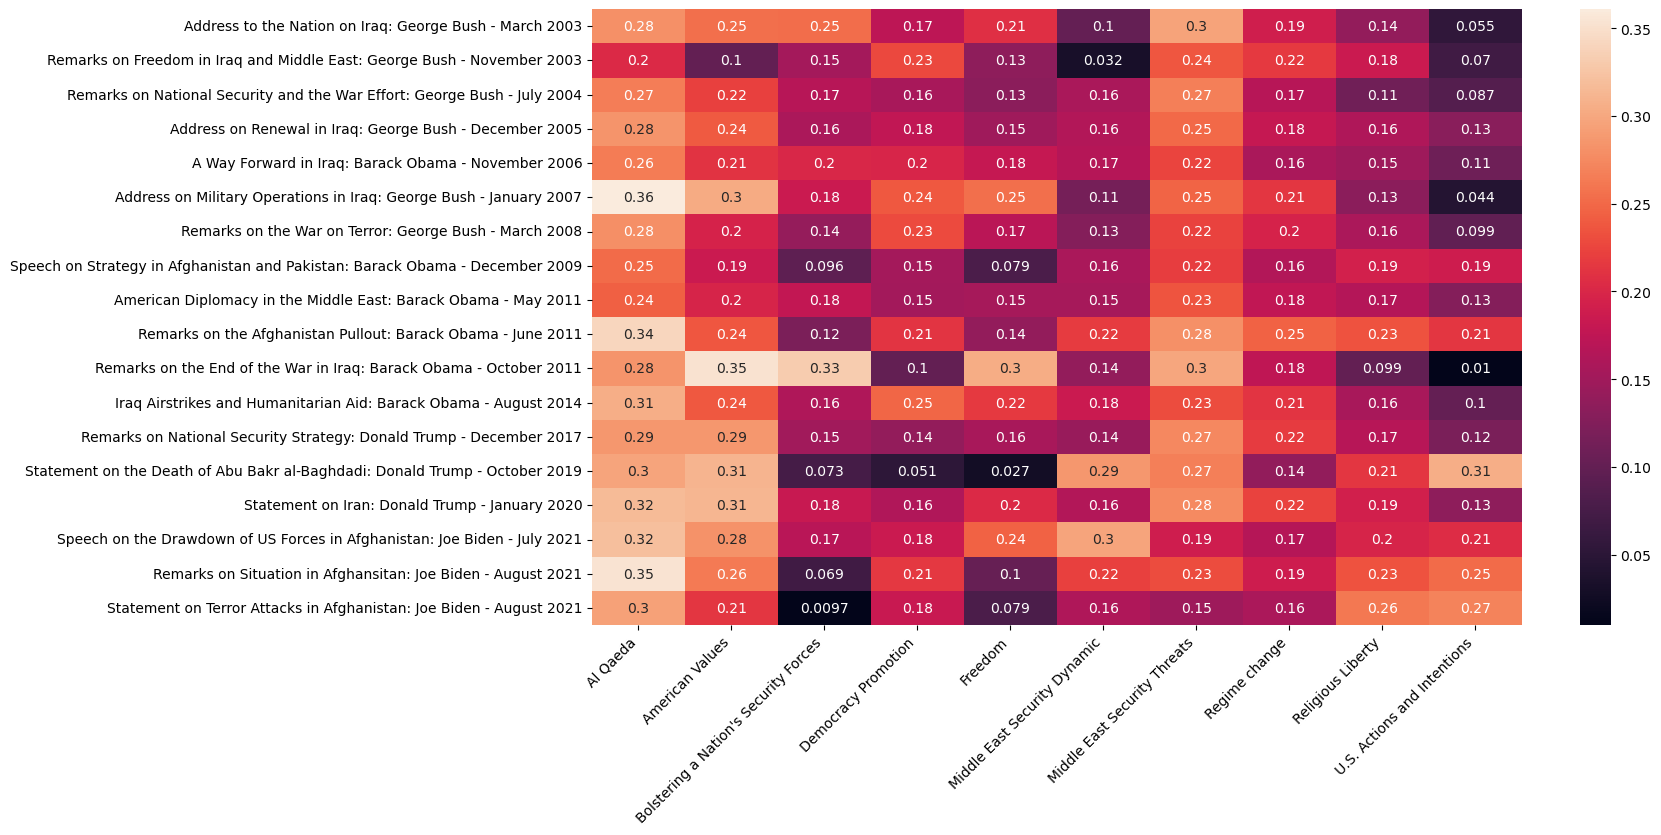

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_pivot_df_pivoted, annot=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.show()

---

### Horizontal Bar Chart - Show top 25 words by score per topic with frequency highlight

In [4]:
from top2vec import Top2Vec

In [5]:
model = Top2Vec.load("C:\\Users\\User\\OneDrive\\Documents\\GitHub\\NLP\\US Presedential Speeches\\Analysis\\Topic Modelling\\US_Speech_Top2Vec_Model")

In [211]:
model.topic_words[1]

array(['iraqis', 'nations', 'iran', 'its', 'must', 'other', 'iraq', 'at',
       'them', 'work', 'all', 'from', 'after', 'by', 'will', 'the', 'up',
       'as', 'america', 'end', 'are', 'government', 'out', 'help',
       'mission', 'with', 'it', 'than', 'continue', 'now', 'be', 'more',
       'had', 'have', 'terrorists', 'and', 'world', 'this', 'region',
       'peace', 'just', 'would', 'to', 'or', 'their', 'last', 'security',
       'there', 'me', 'when'], dtype='<U11')

In [57]:
model.topic_word_scores[0]

array([0.67477405, 0.63805985, 0.6299089 , 0.6290581 , 0.59228843,
       0.5903019 , 0.5901095 , 0.5855586 , 0.5828405 , 0.5753587 ,
       0.5700595 , 0.57004297, 0.5565223 , 0.55433404, 0.54776967,
       0.52583665, 0.5210756 , 0.5159689 , 0.49648976, 0.49293354,
       0.49021783, 0.48792988, 0.48229238, 0.48037338, 0.47364694,
       0.46739438, 0.46725667, 0.4665366 , 0.46556503, 0.4644153 ,
       0.46256417, 0.4561973 , 0.45541787, 0.4513286 , 0.44424698,
       0.43716955, 0.42938596, 0.42763013, 0.42593297, 0.424935  ,
       0.42368734, 0.42126086, 0.42090103, 0.41762766, 0.41356388,
       0.41277483, 0.41209033, 0.41137803, 0.41005558, 0.40963483],
      dtype=float32)

In [7]:
topic_word, word_score, topic_num = model.get_topics(25)

In [8]:
topic_word = topic_word.tolist()
word_score = word_score.tolist()
topic_num = topic_num.tolist()

In [9]:
topic_word_dict = {}
for i in topic_num:
    words = topic_word[i]
    scores = word_score[i]
    word_score_pairs = [[word, score] for word, score in zip(words, scores)]
    topic_word_dict[i] = tuple(word_score_pairs)
topic_word_dict

{0: (['east', 0.6747740507125854],
  ['middle', 0.6380598545074463],
  ['forces', 0.6299089193344116],
  ['do', 0.6290581226348877],
  ['what', 0.5922884345054626],
  ['democracy', 0.5903018712997437],
  ['government', 0.5901095271110535],
  ['when', 0.5855585932731628],
  ['will', 0.5828405022621155],
  ['make', 0.5753586888313293],
  ['afghan', 0.5700594782829285],
  ['help', 0.5700429677963257],
  ['these', 0.5565223097801208],
  ['work', 0.5543340444564819],
  ['support', 0.5477696657180786],
  ['are', 0.5258366465568542],
  ['end', 0.5210756063461304],
  ['an', 0.515968918800354],
  ['continue', 0.4964897632598877],
  ['must', 0.4929335415363312],
  ['just', 0.49021783471107483],
  ['people', 0.4879298806190491],
  ['all', 0.48229238390922546],
  ['its', 0.4803733825683594],
  ['new', 0.47364693880081177],
  ['that', 0.4673943817615509],
  ['so', 0.46725666522979736],
  ['be', 0.46653661131858826],
  ['them', 0.465565025806427],
  ['it', 0.4644153118133545],
  ['military', 0.46256

In [10]:
topic_word_df = pd.DataFrame.from_dict(data=topic_word_dict, orient='columns')

In [11]:
topic_word_df.rename(columns={0:'topic0', 1:'topic1', 2:'topic2', 3:'topic3', 4:'topic4', 5:'topic5', 6:'topic6', 7:'topic7', 8:'topic8', 9:'topic9',
                              10:'topic10', 11:'topic11', 12:'topic12', 13:'topic13', 14:'topic14', 15:'topic15', 16:'topic16', 17:'topic17', 18:'topic18',
                              19:'topic19', 20:'topic20', 21:'topic21', 22:'topic22', 23:'topic23', 24:'topic24'}, inplace=True)

In [12]:
def topic_word_df_convert(topic_col):
    df = pd.DataFrame(topic_word_df[topic_col])
    word_list = []
    score_list = []
    for id, row in df.iterrows():
        word = row[0][0]
        score = row[0][1]
        word_list.append(word)
        score_list.append(score)
    df['word'] = word_list
    df['score'] = score_list
    #df['topic'] = topic_col[-1]
    if len(topic_col) == 6:
        df['topic'] = topic_col[-1]
    elif len(topic_col) == 7:
        df['topic'] = topic_col[-2:]
    df.drop(columns=[topic_col], inplace=True)
    return df

In [13]:
topic0 = topic_word_df_convert('topic0')
topic1 = topic_word_df_convert('topic1')
topic2 = topic_word_df_convert('topic2')
topic3 = topic_word_df_convert('topic3')
topic4 = topic_word_df_convert('topic4')
topic5 = topic_word_df_convert('topic5')
topic6 = topic_word_df_convert('topic6')
topic7 = topic_word_df_convert('topic7')
topic8 = topic_word_df_convert('topic8')
topic9 = topic_word_df_convert('topic9')
topic10 = topic_word_df_convert('topic10')
topic11 = topic_word_df_convert('topic11')
topic12 = topic_word_df_convert('topic12')
topic13 = topic_word_df_convert('topic13')
topic14 = topic_word_df_convert('topic14')
topic15 = topic_word_df_convert('topic15')
topic16 = topic_word_df_convert('topic16')
topic17 = topic_word_df_convert('topic17')
topic18 = topic_word_df_convert('topic18')
topic19 = topic_word_df_convert('topic19')
topic20 = topic_word_df_convert('topic20')
topic21 = topic_word_df_convert('topic21')
topic22 = topic_word_df_convert('topic22')
topic23 = topic_word_df_convert('topic23')
topic24 = topic_word_df_convert('topic24')

In [14]:
topic_word_df_final = pd.concat([topic0, topic1, topic2, topic3, topic4, topic5, topic6, topic7, topic8, topic9, topic10, topic11, topic12, topic13, topic14, topic15, topic16, topic17, topic18,
                                topic19, topic20, topic21, topic22, topic23, topic24], axis=0)
topic_word_df_final

,word,score,topic
0,east,0.674774,0
1,middle,0.638060,0
2,forces,0.629909,0
3,do,0.629058,0
4,what,0.592288,0
...,...,...,...
45,so,-0.568487,24
46,re,-0.570313,24
47,than,-0.570471,24
48,iraq,-0.572954,24


In [15]:
topic_word_df_final['topic'] = topic_word_df_final['topic'].astype(np.int64)
topic_word_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   word    1250 non-null   object 
 1   score   1250 non-null   float64
 2   topic   1250 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 39.1+ KB


In [16]:
#topic_word_df_final.to_pickle("C:\\Users\\User\\OneDrive\\Documents\\GitHub\\NLP\\US Presedential Speeches\\Dash App\\datasets\\topic_word_final_df.pkl")

---

## Visualisations for the app

In [17]:
topic_labels = {0:'Regime change', 1:'American Values', 2:'Al Qaeda', 3:'Democracy Promotion', 4:'Middle East Security Threats', 5:'Not Determined', 6:'Not Determined',
                7:"Bolstering a Nation's Security Forces", 8:'Not Determined',9:'Not Determined', 10:'Al Qaeda2', 11:'Not Determined',12:'Middle East Security Dynamic',
                13:'Not Determined',14:'Freedom', 15:'U.S. Actions and Intentions',16:'Not Determined',17:'Al Qaeda3',18:'Not Determined', 19:'Not Determined',20:'U.S. Policy Reflection',21:'International Security Threats',
                22:'Not Determined', 23:'Not Determined',24:'Religious Liberty'}

In [18]:
topic_name_df = pd.DataFrame.from_dict(data=topic_labels, orient='index').rename(columns={0:'topic name'}).reset_index()
topic_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       25 non-null     int64 
 1   topic name  25 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [19]:
topic_word_df_final = topic_word_df_final.merge(topic_name_df, how='inner', left_on='topic', right_on='index').drop(columns='index')

In [20]:
topic_word_df_final

,word,score,topic,topic name
0,east,0.674774,0,Regime change
1,middle,0.638060,0,Regime change
2,forces,0.629909,0,Regime change
3,do,0.629058,0,Regime change
4,what,0.592288,0,Regime change
...,...,...,...,...
1245,so,-0.568487,24,Religious Liberty
1246,re,-0.570313,24,Religious Liberty
1247,than,-0.570471,24,Religious Liberty
1248,iraq,-0.572954,24,Religious Liberty


In [176]:
topic_word_df_final[topic_word_df_final['topic'] == 0].sort_values(by='score', ascending=False)

,word,score,topic,topic name
0,east,0.674774,0,Regime change
1,middle,0.638060,0,Regime change
2,forces,0.629909,0,Regime change
3,do,0.629058,0,Regime change
4,what,0.592288,0,Regime change
5,democracy,0.590302,0,Regime change
6,government,0.590110,0,Regime change
7,when,0.585559,0,Regime change
8,will,0.582841,0,Regime change
9,make,0.575359,0,Regime change


In [21]:
def get_words_bar_chart(topic):

    df = topic_word_df_final[topic_word_df_final['topic'] == topic].sort_values(by='score', ascending=False)

    sns.set_color_codes("pastel")
    bar_fig = sns.barplot(data=df, x='score', y='word', label='Word to Topic Similarity Score', color='b')
    plt.title("Top 50 Words in Topic Ordered by Topic Similarity Score")
    plt.rcParams['figure.figsize']= (6,15)

    return bar_fig

<Axes: title={'center': 'Top 50 Words in Topic Ordered by Topic Similarity Score'}, xlabel='score', ylabel='word'>

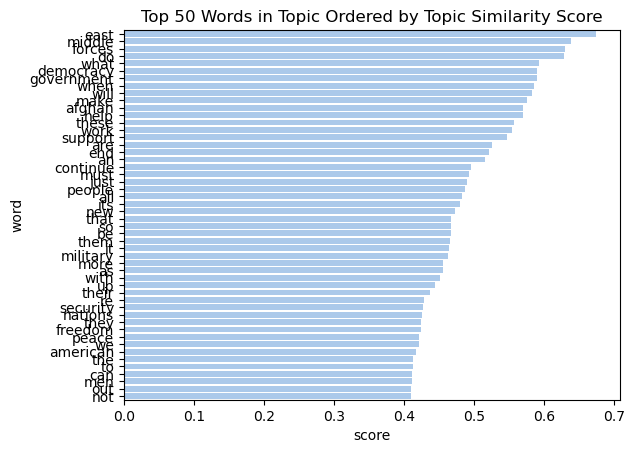

In [22]:
get_words_bar_chart(0)

In [205]:
df = pd.read_pickle("C:\\Users\\User\\OneDrive\\Documents\\GitHub\\NLP\\US Presedential Speeches\\Dash App\\datasets\\topic_word_final_df.pkl")

In [210]:
df = df[df['topic'] == 1].sort_values(by='score', ascending=True)
df['topic name'].unique()[0]

'American Values'

In [29]:
def get_words_bar_chart(topic):
    df = topic_word_df_final[topic_word_df_final['topic'] == topic]
    if sum(df['score']) < 0:
        df = df.sort_values(by='score', ascending=True)
    else:
        df = df.sort_values(by='score', ascending=False)
    return df


In [35]:
topic_word_df_final.head()

,word,score,topic,topic name
0,east,0.674774,0,Regime change
1,middle,0.638060,0,Regime change
2,forces,0.629909,0,Regime change
3,do,0.629058,0,Regime change
4,what,0.592288,0,Regime change


In [37]:
#pd.read_pickle("C:\\Users\\User\\OneDrive\\Documents\\GitHub\\NLP\\US Presedential Speeches\\Dash App\\datasets\\topic_word_final_df.pkl")

In [ ]:
topic_word_df_final.to_pickle("C:\\Users\\User\\OneDrive\\Documents\\GitHub\\NLP\\US Presedential Speeches\\Dash App\\datasets\\topic_word_final_df.pkl")

In [34]:
topic_word_df_final['topic name'].unique()

array(['Regime change', 'American Values', 'Al Qaeda',
       'Democracy Promotion', 'Middle East Security Threats',
       'Not Determined', "Bolstering a Nation's Security Forces",
       'Al Qaeda2', 'Middle East Security Dynamic', 'Freedom',
       'U.S. Actions and Intentions', 'Al Qaeda3',
       'U.S. Policy Reflection', 'International Security Threats',
       'Religious Liberty'], dtype=object)

In [31]:
get_words_bar_chart(24)

,word,score,topic,topic name
1249,us,-0.573657,24,Religious Liberty
1248,iraq,-0.572954,24,Religious Liberty
1247,than,-0.570471,24,Religious Liberty
1246,re,-0.570313,24,Religious Liberty
1245,so,-0.568487,24,Religious Liberty
1244,me,-0.567535,24,Religious Liberty
1243,we,-0.566100,24,Religious Liberty
1242,it,-0.565236,24,Religious Liberty
1241,every,-0.559547,24,Religious Liberty
1240,with,-0.557069,24,Religious Liberty


---

### Top 15 documents and score by Topic

In [213]:
docs, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=20)

In [214]:
for doc, score, doc_id in zip(docs, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 329, Score: 0.9651969075202942
-----------
And options in the Middle East became available. 
-----------

Document: 395, Score: 0.9602444171905518
-----------
And options in the Middle East became available. 
-----------

Document: 864, Score: 0.9577203392982483
-----------
As they do, we must learn their lessons.
-----------

Document: 1747, Score: 0.9481912851333618
-----------
So America will hold the Iraqi government to the benchmarks it has announced.
-----------

Document: 1015, Score: 0.9342229962348938
-----------
The Syrian government must stop shooting demonstrators and allow peaceful protests.
-----------

Document: 1040, Score: 0.9289458990097046
-----------
So in the months ahead, America must use all our influence to encourage reform in the region.
-----------

Document: 1602, Score: 0.9264459609985352
-----------
Governments across the Middle East and North Africa are beginning to see the need for change.
-----------

Document: 218, Score: 0.9186034798622131
--

In [244]:
def get_document_df(topic_num):
    topic_doc_dict = {}
    docs, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_num, num_docs=15)
    
    df = pd.DataFrame(index=[i for i in range(0,15)], columns=['document', 'doc_score', 'doc_id', 'topic_num'])
    df['document'] = docs.tolist()
    df['doc_score'] = document_scores.tolist()
    df['doc_id'] = document_ids.tolist()
    df['topic_num'] = topic_num

    return df


In [245]:
topic_doc_df = pd.concat([get_document_df(0), get_document_df(1), get_document_df(2), get_document_df(3), get_document_df(4),
get_document_df(5), get_document_df(6), get_document_df(7), get_document_df(8), get_document_df(9),
get_document_df(10), get_document_df(11), get_document_df(12), get_document_df(13), get_document_df(14),
get_document_df(15), get_document_df(16), get_document_df(17), get_document_df(18), get_document_df(19),
get_document_df(20), get_document_df(21), get_document_df(22), get_document_df(23), get_document_df(24)]).reset_index().rename(columns={'index':'doc_num'})

In [246]:
topic_doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   doc_num    375 non-null    int64  
 1   document   375 non-null    object 
 2   doc_score  375 non-null    float64
 3   doc_id     375 non-null    int64  
 4   topic_num  375 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 14.8+ KB


In [247]:
topic_doc_df['topic_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [248]:
topic_doc_df['doc_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [252]:
topic_doc_df.head()

,doc_num,document,doc_score,doc_id,topic_num
0,0,And options in the Middle East became available.,0.965197,329,0
1,1,And options in the Middle East became available.,0.960244,395,0
2,2,"As they do, we must learn their lessons.",0.957720,864,0
3,3,So America will hold the Iraqi government to t...,0.948191,1747,0
4,4,The Syrian government must stop shooting demon...,0.934223,1015,0


In [255]:
topic_doc_df.to_pickle("C:\\Users\\User\\OneDrive\\Documents\\GitHub\\NLP\\US Presedential Speeches\\Dash App\\datasets\\topic_doc_df.pkl")

Define a function that returns doc num, doc score and document in print format

In [250]:
topic_doc_df[topic_doc_df['topic_num'] == 0]['doc_id'].tolist()

[329,
 395,
 864,
 1747,
 1015,
 1040,
 1602,
 218,
 2080,
 2017,
 331,
 578,
 1678,
 397,
 325]

In [263]:
df11 = topic_doc_df[topic_doc_df['topic_num'] == 0].loc[:,['doc_id', 'document', 'doc_score']]
df11.columns.unique().tolist()

['doc_id', 'document', 'doc_score']

In [267]:
[df11[i].tolist() for i in df11.columns[1:]]

[['And options in the Middle East became available.\xa0',
  'And options in the Middle East became available.\xa0',
  'As they do, we must learn their lessons.',
  'So America will hold the Iraqi government to the benchmarks it has announced.',
  'The Syrian government must stop shooting demonstrators and allow peaceful protests.',
  'So in the months ahead, America must use all our influence to encourage reform in the region.',
  'Governments across the Middle East and North Africa are beginning to see the need for change.',
  'So, thank you.',
  'And he responded, "I am Iraqi.',
  'But it is the beginning of something new: constitutional democracy at the heart of the Middle East.',
  'We are independent, and we do not need Middle East oil.',
  'Some of you fought in Afghanistan.',
  'And may God continue to bless America.',
  'We are independent, and we do not need Middle East oil.',
  'Today, I am going to ask NATO to become much more involved in the Middle East process.\xa0'],
 [0.

In [1]:
round(df11['doc_score'], 2)

NameError: name 'df11' is not defined

In [254]:
doc_id_list = topic_doc_df[topic_doc_df['topic_num'] == 0]['doc_id'].tolist()
doc_score_list = topic_doc_df[topic_doc_df['topic_num'] == 0]['doc_score'].tolist()
doc_list = topic_doc_df[topic_doc_df['topic_num'] == 0]['document'].tolist()


for doc_id, doc_score, doc in zip(doc_id_list, doc_score_list, doc_list):
    print(f"Document: {doc_id}, Score: {doc_score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 329, Score: 0.9651969075202942
-----------
And options in the Middle East became available. 
-----------

Document: 395, Score: 0.9602444171905518
-----------
And options in the Middle East became available. 
-----------

Document: 864, Score: 0.9577203392982483
-----------
As they do, we must learn their lessons.
-----------

Document: 1747, Score: 0.9481912851333618
-----------
So America will hold the Iraqi government to the benchmarks it has announced.
-----------

Document: 1015, Score: 0.9342229962348938
-----------
The Syrian government must stop shooting demonstrators and allow peaceful protests.
-----------

Document: 1040, Score: 0.9289458990097046
-----------
So in the months ahead, America must use all our influence to encourage reform in the region.
-----------

Document: 1602, Score: 0.9264459609985352
-----------
Governments across the Middle East and North Africa are beginning to see the need for change.
-----------

Document: 218, Score: 0.9186034798622131
--